In [1]:
# install and update fastAI
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
# mount drive
from google.colab import drive
drive.mount('/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os
import re

In [4]:
# paths
data_path='/drive/My Drive/GreyAtom/Hackathon 2 NLP/Data/'
project_path='/drive/My Drive/GreyAtom/Hackathon 2 NLP/'
models_path='/drive/My Drive/GreyAtom/Hackathon 2 NLP/train_models/'

In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [7]:
# FastAI imports
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *

In [8]:
data=pd.read_csv(data_path+'train.csv')
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [9]:
data_test=pd.read_csv(data_path+'test.csv')
data_test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [10]:
lemmatizer = WordNetLemmatizer()

#Create a function to clean tweets
def cleanText(text):
    text=str(text)  #Coverts Text to String
    text=re.sub(r'@[A-Za-z0-9]+','',text)  #Removing @Mentions
    text = re.sub(r'[\w]*sxsw[\w]*', ' ', text,flags=re.I)  #Removing sxsw hashtag
    text=re.sub(r'#','',text)  #Removing # Symbols
    text=re.sub(r'RT[\s]+','',text)  #Removing ReTweets
    text=re.sub(r'https?:\/\/\s+','',text)  #Removing the hyperlinks
    text=re.sub(r'bit.ly[/\.\w]+','',text)  #Removing the shortlinks 
    text=text.replace(r'{html}',"") 
    cleanr = re.compile(r'<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub(r'[0-9]+', '', text)  #Removing Numbers
    text = re.sub(r'[^A-Za-z]+', ' ', text)  #Removing all spacial character
    text = text.lower()  #Coverts Text To Lower Case
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text) 
    filtered_words = [w for w in tokens if w not in stopwords.words('english')]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words if w not in ['sxsw','amp','quot','http','html','link']]
    return " ".join(lemma_words)

In [11]:
data['SentimentText'] = data['tweet'].map(lambda s:cleanText(s))
data_test['SentimentText'] = data_test['tweet'].map(lambda s:cleanText(s))
data.head()

,tweet_id,tweet,sentiment,SentimentText
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny i...
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr apple school mkt ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would b pretty awesome crash every ...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ipad


In [12]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have","would b":"would be"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [13]:
data['SentimentText']=data['SentimentText'].apply(lambda x:expand_contractions(x))
data_test['SentimentText']=data_test['SentimentText'].apply(lambda x:expand_contractions(x))
data.head()

,tweet_id,tweet,sentiment,SentimentText
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny i...
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr apple school mkt ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would be pretty awesome crash every...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ipad


In [14]:
# Create a Language Model
data_lm = (TextList.from_df(df=data, cols='SentimentText').split_by_rand_pct(0.2).label_for_lm().databunch(bs=48))

In [15]:
data_lm.save(models_path+'tok_num_1k.pkl')

In [16]:
# Train the language model - Initialize
lm_learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [17]:
 # Find appropriate learning rate
lm_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


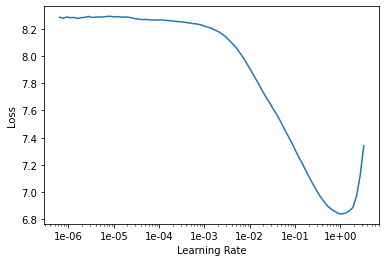

In [18]:
lm_learn.recorder.plot()

In [19]:
# Begin training
lm_learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.565958,5.975227,0.108393,00:02
1,6.437488,5.029396,0.199226,00:02
2,5.761760,4.733103,0.241488,00:02
3,5.308129,4.624009,0.252976,00:02
4,5.005414,4.608129,0.254226,00:02


In [20]:
lm_learn.unfreeze()
lm_learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.361438,4.477849,0.279345,00:03
1,4.264140,4.345752,0.295952,00:02
2,4.061370,4.253464,0.308631,00:03
3,3.853400,4.216114,0.320833,00:03
4,3.680321,4.204254,0.323036,00:03


In [21]:
# Save the LM model
lm_learn.save(models_path+'lm_model_tweets')

In [22]:
# Test the LM Model
TEXT = "I am so sad"
N_WORDS = 10 
N_SENTENCES = 5
print("\n".join(lm_learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I am so sad iphone nice move speak iphone xxbos google launch major new
I am so sad apple opening pop store austin xxbos google launch major new
I am so sad iphone apple opening temporary store downtown austin ipad launch xxbos
I am so sad start today read book google xxbos funny ipad app app
I am so sad apple apple pop store austin xxbos ubersocial iphone app store


In [23]:
# Test the LM Model
TEXT = "I Love"
N_WORDS = 10 
N_SENTENCES = 5
print("\n".join(lm_learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I Love Miss o q website ranking like google tweeting lot
I Love Love o music come free sampler featuring itunes xxbos
I Love Miss Austin Austin j w r
I Love love preview new artist featured artist today xxbos google launch
I Love Miss USA set temporary store austin xxbos google


In [24]:
# Save the encoder
lm_learn.save_encoder(models_path+'encoder_tweets')

In [25]:
# Lead the tokenizer
tok_num = load_data(models_path,'tok_num_1k.pkl')

In [26]:
# Create data
test_clas = TextList.from_df(df=data_test, cols='SentimentText', vocab=tok_num.vocab)
data_clas = (TextList.from_df(df=data, cols='SentimentText', vocab=tok_num.vocab).split_by_rand_pct(0.2).label_from_df(cols='sentiment').add_test(test_clas).databunch(bs=32))

In [27]:
# Save data
data_clas.save(data_path+'twitter_sent_clf_data.pkl')

In [28]:
# View the data
data_clas.show_batch()

text,target
xxbos google mayer google map route around feature save yr drive time every day missed xxunk xxunk save anyone,2
xxbos google art project like street view except art museum around world incl billion xxunk image xxunk night dang,2
xxbos google j xxunk pac man game xxunk really cool see really xxunk original game code recreated j,2
xxbos essential water energy bar smart phone camera map dt xxunk xxunk laptop ipad mp player ipod xxunk,2
xxbos xxunk several xxunk xxunk apple ipad surrounded tech geek mass grab box xxunk pay xxunk xxunk ensues,2


In [29]:
# Model creation
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [30]:
# Load encoder
learn.load_encoder(models_path+'encoder_tweets')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5820 items)
x: TextList
xxbos apple defining xxunk touch different xxunk becoming smaller,xxbos learning ab google doodle doodle light funny xxunk xxunk xxunk xxunk googledoodle,xxbos one face ex xxunk show yr apple school xxunk expert,xxbos iphone app would xxunk pretty awesome xxunk every min extended browsing xxunk xxunk,xxbos line outside apple store austin waiting new ipad
y: CategoryList
1,1,2,0,1
Path: .;

Valid: LabelList (1454 items)
x: TextList
xxbos nice wiebe walking conceptual graphing,xxbos look interesting google launch major new social network called circle possibly today,xxbos per rumor google may preview big social strategy themed costume party yep cnet,xxbos line apple ipad popup store th congress xxunk around th st,xxbos want free juice pack air iphone giving away announced location stay tuned
y: CategoryList
1,2,1,1,1
Path: .;

Test: LabelList (1819 items)
x: TextList
xxbos audience q xxunk tool use xxunk xxunk 

In [31]:
learn.freeze()

In [32]:
# Find learing rate
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


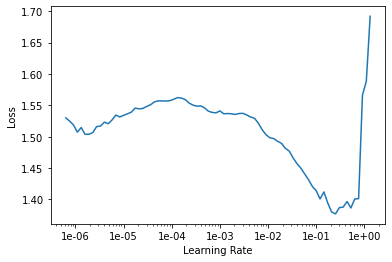

In [33]:
# Plot learning rate
learn.recorder.plot()

In [34]:
# Train the model
learn.fit_one_cycle(21, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.145445,0.990206,0.601788,00:02
1,0.920541,0.861818,0.614856,00:02
2,0.889917,0.860333,0.614168,00:02
3,0.850457,0.853799,0.618982,00:02
4,0.874790,0.869280,0.579780,00:02
5,0.873234,0.850739,0.608666,00:02
6,0.860969,0.877961,0.591472,00:02
7,0.863768,0.878485,0.585282,00:02
8,0.872750,0.843728,0.617607,00:02
9,0.853470,0.843423,0.616231,00:02


In [35]:
# Retrain last 2 layers with 5 epochs
learn.freeze_to(-2)
learn.fit_one_cycle(21, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.815550,0.816819,0.644429,00:02
1,0.806710,0.812924,0.645805,00:03
2,0.814490,0.805216,0.646492,00:03
3,0.814583,0.809587,0.634801,00:03
4,0.783826,0.802203,0.648556,00:03
5,0.787076,0.818333,0.647868,00:02
6,0.768754,0.801278,0.649931,00:03
7,0.766692,0.811151,0.659560,00:03
8,0.734555,0.820244,0.666437,00:03
9,0.698540,0.819166,0.656121,00:02


In [36]:
# Export the model
learn.export(models_path+'tweets_clf.pkl')

In [37]:
# Interpreter instantiation
interp = TextClassificationInterpretation.from_learner(learn)

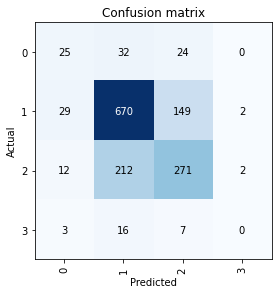

In [38]:
# Confusion matrix
interp.plot_confusion_matrix()

In [39]:
# CLF report
print(classification_report(interp.y_true, interp.pred_class, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        81
           1       0.72      0.79      0.75       850
           2       0.60      0.55      0.57       497
           3       0.00      0.00      0.00        26

    accuracy                           0.66      1454
   macro avg       0.42      0.41      0.41      1454
weighted avg       0.65      0.66      0.65      1454



In [40]:
# Retrain last 3 layers with 5 epochs
learn.freeze_to(-3)
learn.fit_one_cycle(21, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.442374,0.968525,0.667125,00:04
1,0.444772,1.004181,0.662311,00:04
2,0.479664,1.011149,0.656809,00:04
3,0.498776,1.022384,0.663686,00:04
4,0.508176,1.017930,0.652682,00:04
5,0.493906,0.983320,0.643741,00:04
6,0.490484,1.049305,0.645805,00:04
7,0.474314,0.969750,0.656809,00:04
8,0.436456,1.018568,0.654058,00:04
9,0.394413,1.057752,0.656121,00:04


In [41]:
# Export the model
learn.export(models_path+'tweets_clf_v2.pkl')

In [42]:
# Interpreter instantiation
interp = TextClassificationInterpretation.from_learner(learn)

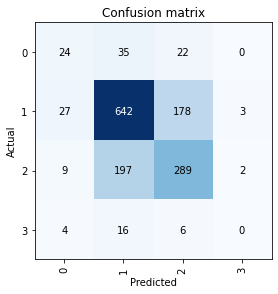

In [43]:
# Confusion matrix
interp.plot_confusion_matrix()

In [44]:
# CLF report
print(classification_report(interp.y_true, interp.pred_class, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33        81
           1       0.72      0.76      0.74       850
           2       0.58      0.58      0.58       497
           3       0.00      0.00      0.00        26

    accuracy                           0.66      1454
   macro avg       0.42      0.41      0.41      1454
weighted avg       0.64      0.66      0.65      1454



In [45]:
learn.show_results()

text,target,prediction
xxbos ha ha news yahoo com xxunk search traffic new site google com doubt last xxunk w weird name,1,1
xxbos xxunk xxunk going note speech ipad v android v world got ipad day ago feel like expert already,2,2
xxbos listening twit live also went xxunk xxunk party google robot event saw tim xxunk speak checked ebay hackathon,2,2
xxbos talking social medium xxunk platform sm v xxunk v google analytics smmnextgen right line w xxunk last night,1,1
xxbos dear new rule google b xxunk also add film gt xxunk xxunk xxunk w xxunk xxunk xxunk,1,1


In [46]:
pred,target=learn.get_preds(DatasetType.Test,ordered=True)

In [47]:
labels=np.argmax(pred,axis=1)

In [50]:
submission = pd.DataFrame({'tweet_id': data_test['tweet_id'], 'sentiment': labels})

In [51]:
submission.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,2
3,7688,2
4,3294,2


In [52]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   1819 non-null   int64
 1   sentiment  1819 non-null   int64
dtypes: int64(2)
memory usage: 28.5 KB


In [53]:
submission.to_csv(data_path+'submission_file.csv',index=False)